In [ ]:
#Load dữ liệu từ drive vào các biến X_train, y_train
from os import listdir
from numpy import asarray,save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
folder = '/content/drive/MyDrive/AI/10TraiCay/'
photos, labels = list(),list()
for file in listdir(folder):
  output = 0.
  if file.startswith('Chuoi'):
    output = 1.0
  if file.startswith('VietQuat'):
    output = 2.0
  if file.startswith('DuaLuoi'):
    output = 3.0
  if file.startswith('Cherri'):
    output = 4.0
  if file.startswith('Kiwi'):
    output = 5.0
  if file.startswith('Chanh'):
    output = 6.0
  if file.startswith('CaChua'):
    output = 7.0
  if file.startswith('Luu'):
    output = 8.0
  if file.startswith('Oi'):
    output = 9.0
  photo = load_img(folder+file,target_size=(100,100))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels= asarray(labels)
print(photos.shape,labels.shape)
save('X_train.npy',photos)
save('y_train.npy',labels)

(292, 100, 100, 3) (292,)


In [ ]:
folder = '/content/drive/MyDrive/AI/Test/'
photos1, labels1 = list(),list()
for file in listdir(folder):
  output = 0.
  if file.startswith('Chuoi'):
    output = 1.0
  if file.startswith('VietQuat'):
    output = 2.0
  if file.startswith('DuaLuoi'):
    output = 3.0
  if file.startswith('Cherri'):
    output = 4.0
  if file.startswith('Kiwi'):
    output = 5.0
  if file.startswith('Chanh'):
    output = 6.0
  if file.startswith('CaChua'):
    output = 7.0
  if file.startswith('Luu'):
    output = 8.0
  if file.startswith('Oi'):
    output = 9.0
  photo = load_img(folder+file,target_size=(100,100))
  photo = img_to_array(photo)
  photos1.append(photo)
  labels1.append(output)
photos1 = asarray(photos1)
labels1= asarray(labels1)
print(photos1.shape,labels1.shape)
save('X_train.npy',photos1)
save('y_train.npy',labels1)

(50, 100, 100, 3) (50,)


In [ ]:
#Chuyển kiểu dữ liệu
photos = photos.astype('float32')
photos1 = photos1.astype('float32')
photos/=255
photos1/=255
from keras.utils import np_utils
labels=np_utils.to_categorical(labels,10)
labels1=np_utils.to_categorical(labels1,10)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Activation, BatchNormalization, Dropout, LSTM
model = VGG16(include_top=False,input_shape=(100,100,3))
for layers in model.layers:
  layers.trainable = False
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128,activation='relu',kernel_initializer='he_uniform')(flat1)
output = Dense(10,activation='softmax')(class1)
model = Model(inputs=model.inputs,outputs=output)
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer=opt, loss = 'categorical_crossentropy',metrics=['accuracy'])
history = model.fit(photos,labels,epochs=100, batch_size=32, validation_data=(photos1,labels1),verbose=1)

58900480/58889256 [==============================] - 0s 0us/step
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


10/10 [==============================] - 12s 166ms/step - loss: 2.2943 - accuracy: 0.2123 - val_loss: 1.9412 - val_accuracy: 0.2400
Epoch 2/100
10/10 [==============================] - 0s 42ms/step - loss: 1.7153 - accuracy: 0.4075 - val_loss: 2.3589 - val_accuracy: 0.3000
Epoch 3/100
10/10 [==============================] - 0s 41ms/step - loss: 1.4071 - accuracy: 0.5342 - val_loss: 1.3939 - val_accuracy: 0.4800
Epoch 4/100
10/10 [==============================] - 0s 42ms/step - loss: 1.0432 - accuracy: 0.6267 - val_loss: 1.3309 - val_accuracy: 0.5600
Epoch 5/100
10/10 [==============================] - 0s 42ms/step - loss: 0.8802 - accuracy: 0.6747 - val_loss: 1.6977 - val_accuracy: 0.4200
Epoch 6/100
10/10 [==============================] - 0s 42ms/step - loss: 1.0093 - accuracy: 0.6610 - val_loss: 1.8448 - val_accuracy: 0.4400
Epoch 7/100
10/10 [==============================] - 0s 43ms/step - loss: 0.8101 - accuracy: 0.7260 - val_loss: 1.2716 - val_accuracy: 0.5800
Epoch 8/100
10/1

In [ ]:
# Độ chính xác
score = model.evaluate (photos1,labels1,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.7126470804214478
Test accuracy: 0.800000011920929


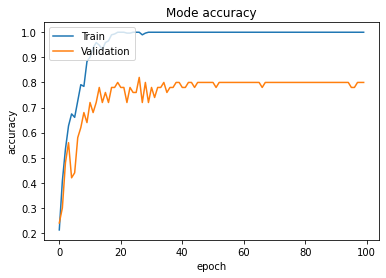

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Mode accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.show()

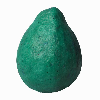

Ôỉ


In [ ]:
#Kiểm tra nhận dạng
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
folder = '/content/drive/MyDrive/AI/Test/'
filename = folder+'Oi.26.jpg'
img = load_img(filename, target_size=(100,100))
img = img_to_array(img)
cv2_imshow(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32')
img/=255
u= np.argmax(model.predict(img))
nhandang = ['Táo','Chuối','Việt Quất','Dưa Lưới','Cherri','Kiwi','Chanh','Cà Chua','Lựu','Ôỉ']
print(nhandang[u])